# PD7 Jakub Szypuła

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.decomposition import PCA

img = mpimg.imread("pic.png")

## Obrazek

Poniższy obrazek jest przyjemną, prostą tapetą o ograniczonej, acz ciekawej palecie barw. Dlatego interesuje mnie, jak można zmniejszyć rozmiar tego obrazu poprzez zastosowanie PCA.

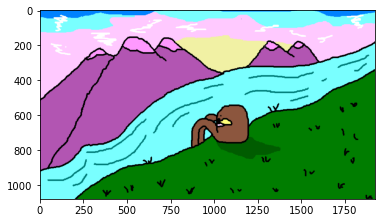

In [32]:
plt.imshow(img)

In [11]:
img.shape

(1080, 1920, 3)

In [12]:
img_reshaped = np.reshape(img, (1080, 1920 * 3))

Jak widać obrazek jest zaprezentowany w rozmiarze 1920 x 1080, z trzema kanałami.

In [20]:
pca = PCA(0.95).fit(img_reshaped)
img_pca = pca.transform(img_reshaped)
img_pca.shape

(1080, 55)

Wygląda naprawdę dobrze - około 100 razy mniejszy rozmiar. Przekonajmy się, jak zareagowała na to jakość obrazka.

In [21]:
img_decompressed = pca.inverse_transform(img_pca)
img_decompressed.shape

(1080, 5760)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


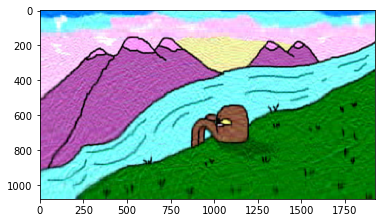

In [22]:
img_decompressed = np.reshape(img_decompressed, (1080, 1920, 3))
plt.imshow(img_decompressed)

Niestety, trochę na tym ucierpiała. Może lekka zmiana parametru w PCA pomoże?

In [29]:
pca = PCA(0.99).fit(img_reshaped)
img_pca = pca.transform(img_reshaped)
img_pca.shape

(1080, 173)

In [30]:
img_decompressed = pca.inverse_transform(img_pca)
img_decompressed.shape

(1080, 5760)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


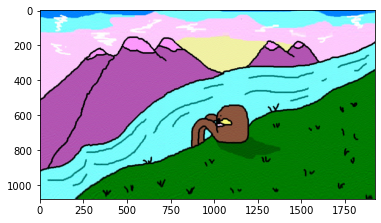

In [31]:
img_decompressed = np.reshape(img_decompressed, (1080, 1920, 3))
plt.imshow(img_decompressed)

W tym wypadku kompresja dalej jest znacząca - mamy około 33 krotną redukcję rozmiaru macierzy, bez zauważalnego spadku jakości. Oznacza to, że faktycznie można z pomocą PCA dokonać znaczącej kompresji obrazu, często nawet bez straty dla jakości.

## Oświadczenie
Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu Wstęp do Uczenia Maszynowego została wykonana przeze mnie samodzielnie.

Jakub Szypuła
298845